## Forecasting with Python

### Introduction to DeepRetail

Deep Retail is an open source package under development by the AI team on VIVES University of Applied Sciences.

The package is used in our research on demand forecasting. 

The main components of the package:

* Data Preprocessing
* Data Exploration 
* Statistical Forecasting
* Easy Evaluation
* **Hierarchical Modelling**
* **Forecasting with Deep Learning**

The aim of the presentation is to showcase the simplicity of the package.

### Installation

1. Install python 3.7+
2. Create a virtual env where you want to install: 

    $> source retailanalytics/bin/activate

3. Activate the environment

    $> source retailanalytics/bin/activate

4. Install the package with pip

    $> pip install DeepRetail

## Small Demonstration:

### Preprocessing

Will work on the M5 Dataset

In [1]:
import pandas as pd

In [2]:
# Define file location
filepath = "/home/filtheo/DeepRetail/m5_week.csv"

# Reading
df = pd.read_csv(filepath, index_col = 0)

In [3]:
df.head()

,2011-01-30,2011-02-06,2011-02-13,2011-02-20,2011-02-27,2011-03-06,2011-03-13,2011-03-20,2011-03-27,2011-04-03,...,2016-03-20,2016-03-27,2016-04-03,2016-04-10,2016-04-17,2016-04-24,2016-05-01,2016-05-08,2016-05-15,2016-05-22
unique_id,,,,,,,,,,,,,,,,,,,,,
HOBBIES_1_001_CA_1,0,0,0,0,0,0,0,0,0,0,...,10,8,2,12,5,8,10,5,11,7
HOBBIES_1_002_CA_1,0,0,0,0,0,0,0,0,0,0,...,0,4,1,0,0,1,1,1,3,2
HOBBIES_1_003_CA_1,0,0,0,0,0,0,0,0,0,0,...,1,2,1,1,8,6,5,6,4,6
HOBBIES_1_004_CA_1,0,0,0,0,0,2,3,2,4,6,...,14,25,6,16,11,18,14,12,7,16
HOBBIES_1_005_CA_1,0,0,0,0,0,0,0,0,0,0,...,11,6,14,4,8,12,10,15,8,6


In [4]:
# Weekly frequency in pivoted format!

Change the format of the DataFrame

In [5]:
from DeepRetail.preprocessing.converters import transaction_df, pivoted_df

In [6]:
trans_df = transaction_df(df, drop_zeros = True) # drop_zeros = False drops zeros to save memory
trans_df

,unique_id,date,y
7,HOBBIES_1_008_CA_1,2011-01-30,27
8,HOBBIES_1_009_CA_1,2011-01-30,2
11,HOBBIES_1_012_CA_1,2011-01-30,2
14,HOBBIES_1_015_CA_1,2011-01-30,4
15,HOBBIES_1_016_CA_1,2011-01-30,6
...,...,...,...
8476215,FOODS_3_823_WI_3,2016-05-22,4
8476216,FOODS_3_824_WI_3,2016-05-22,2
8476217,FOODS_3_825_WI_3,2016-05-22,6
8476218,FOODS_3_826_WI_3,2016-05-22,13


The two formats are used for different purposes.

I can easily resample data to different frequencies


In [7]:
# Define the new frequency 
new_freq = 'M'

pivot_df = pivoted_df(trans_df, target_frequency = new_freq, agg_func = 'sum')
pivot_df.head()

,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,...,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31
unique_id,,,,,,,,,,,,,,,,,,,,,
FOODS_1_001_CA_1,3.0,40.0,39.0,21.0,52.0,28.0,28.0,2.0,0.0,0.0,...,19.0,15.0,16.0,26.0,24.0,17.0,20.0,24.0,33.0,23.0
FOODS_1_001_CA_2,2.0,57.0,32.0,22.0,65.0,54.0,64.0,10.0,0.0,0.0,...,24.0,22.0,39.0,25.0,34.0,34.0,36.0,28.0,31.0,18.0
FOODS_1_001_CA_3,3.0,49.0,41.0,63.0,77.0,43.0,60.0,12.0,0.0,2.0,...,21.0,55.0,25.0,37.0,36.0,29.0,40.0,32.0,24.0,27.0
FOODS_1_001_CA_4,1.0,16.0,21.0,15.0,24.0,17.0,24.0,1.0,0.0,0.0,...,14.0,13.0,4.0,9.0,11.0,6.0,0.0,14.0,9.0,6.0
FOODS_1_001_TX_1,1.0,10.0,21.0,12.0,24.0,18.0,21.0,2.0,0.0,0.0,...,19.0,14.0,14.0,19.0,23.0,45.0,8.0,17.0,1.0,26.0


### Exploratory

Data exploration is very important in every forecasting application.

Before designing a strategy to tackle our problem at hand:

1. Forecasting
2. Outlier Detection
3. Classifiction 

We first **NEED** to understand our data.

If we dont:
* We might spend valuable time and resources for no reason.
* Reach suboptional decisions
* Have no idea why the model works/fails

In [8]:
from DeepRetail.exploratory.stats import print_summary, visualize_series, get_features, plot_level_volume_variance, zeros_hist, intermittency_classification, CV_zeros_plot

Important Step 1: Get some very basic information

In [9]:
print_summary(pivot_df)

A total of 30490 items for a total of 65 periods


Important Step 2: Visually inspect as many time series as possible

Tip: I usualy spend 3-4 hours just observing the time series and keeping notes

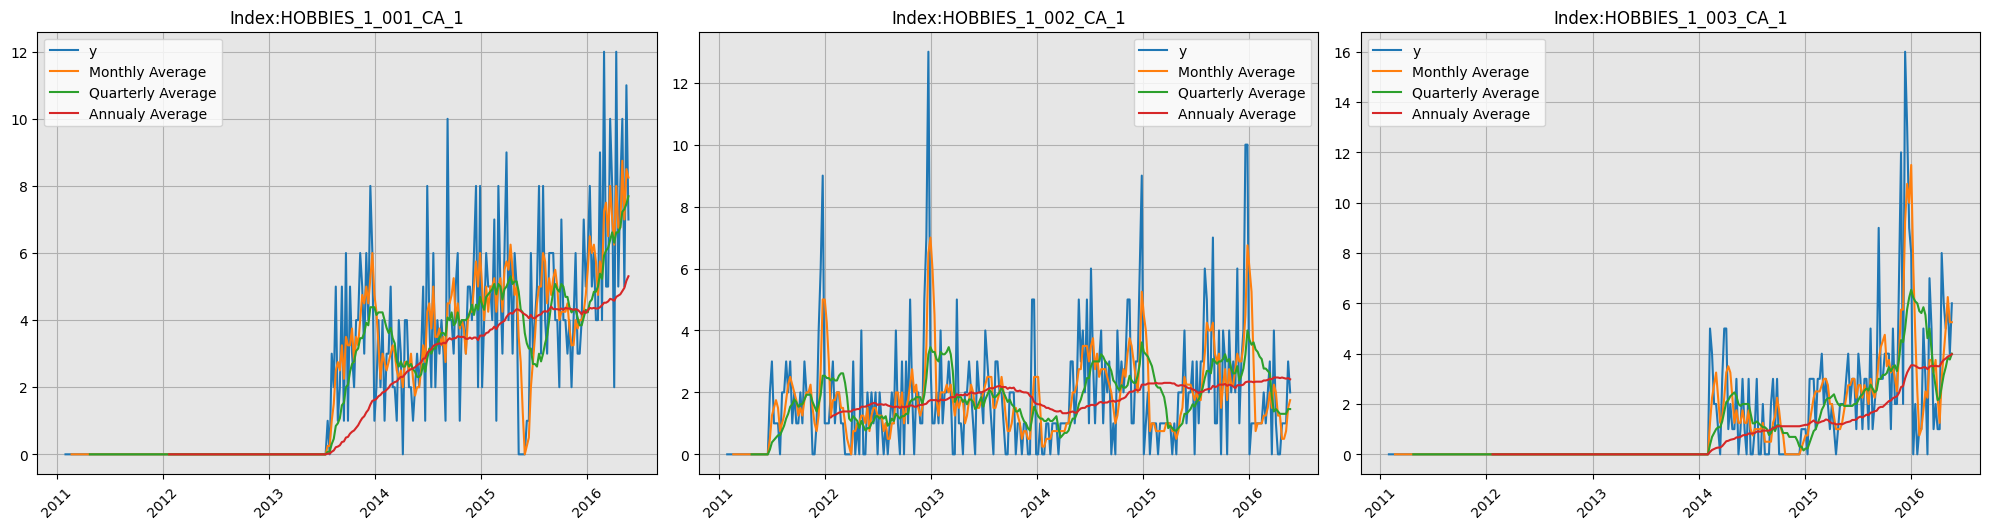

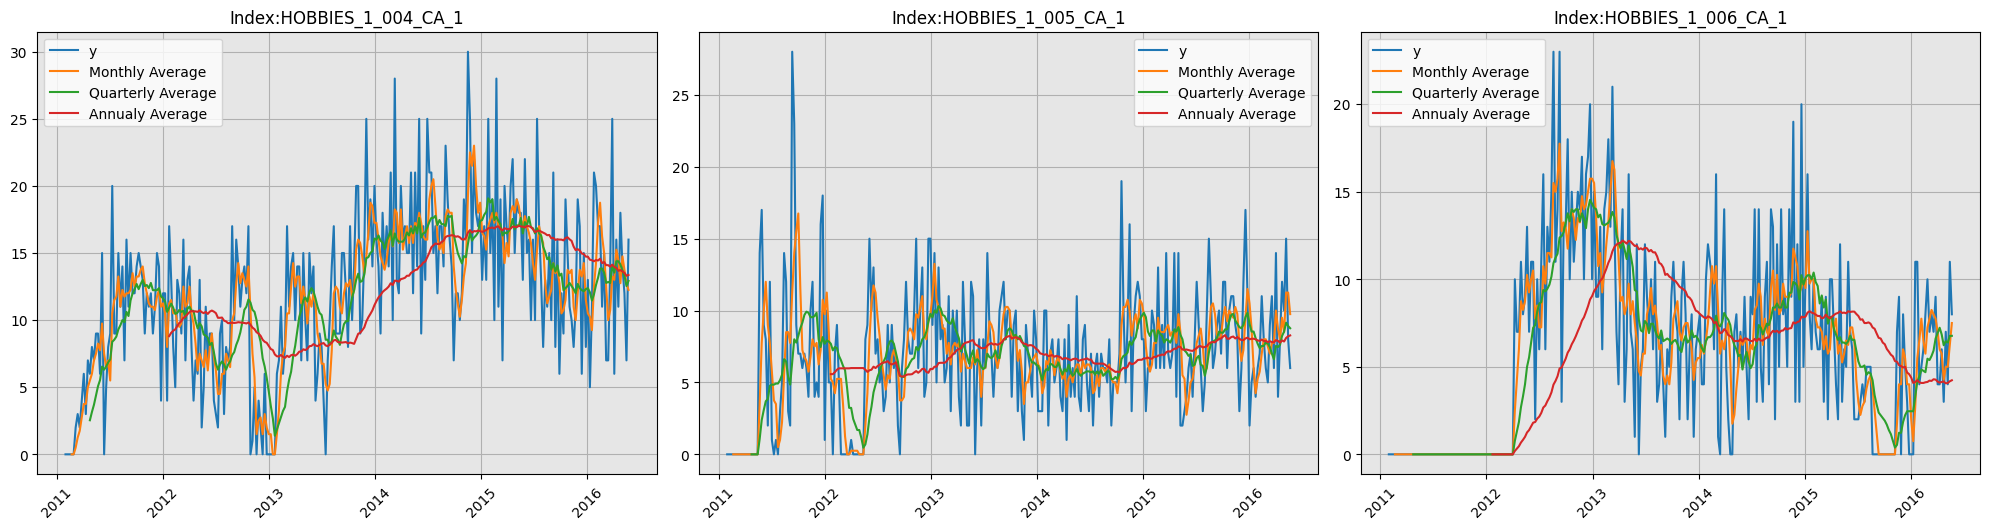

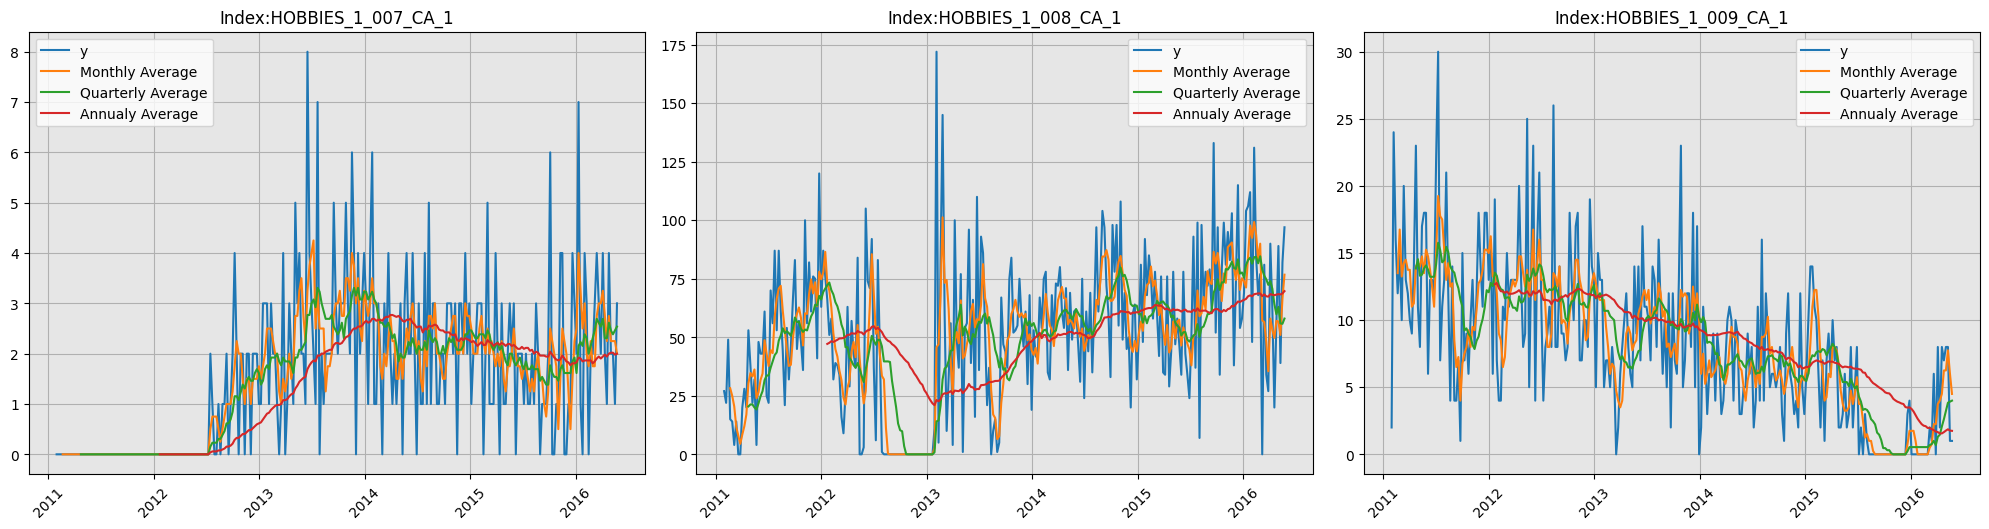

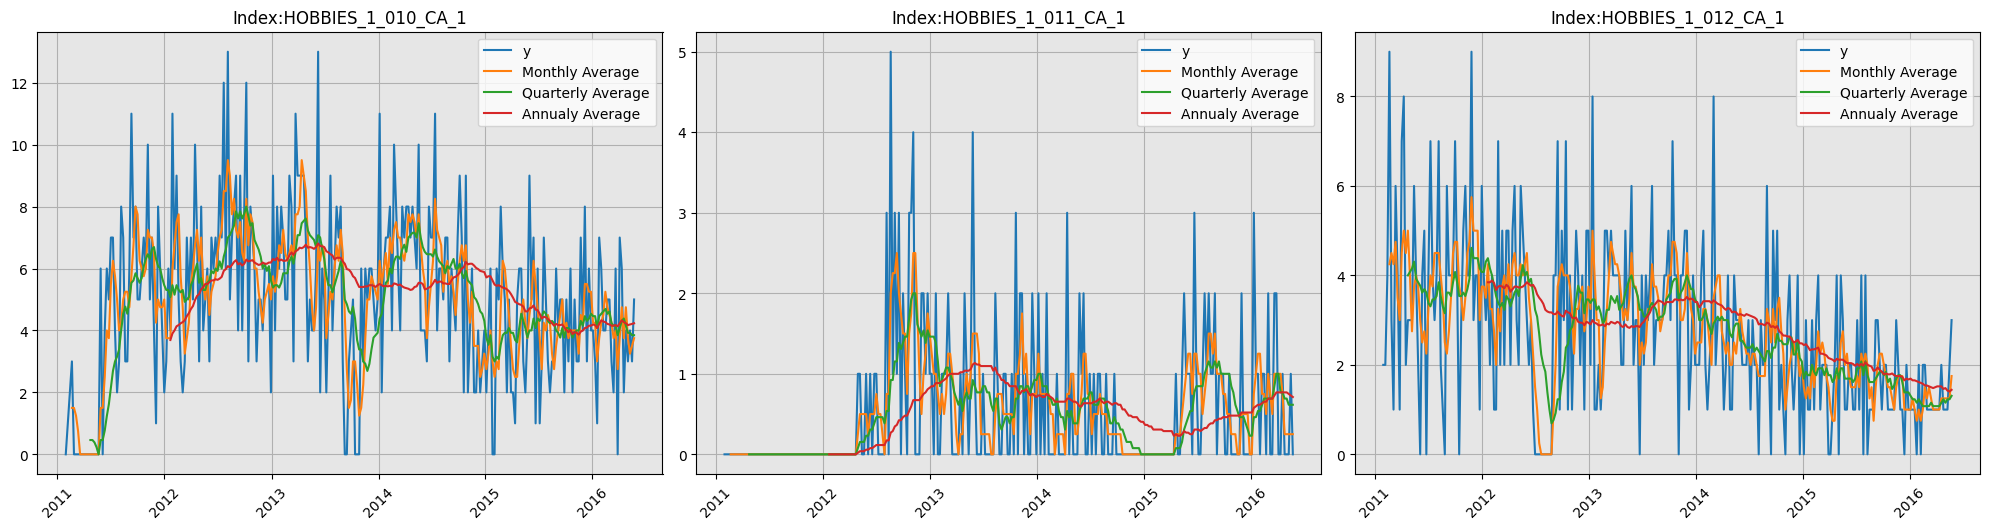

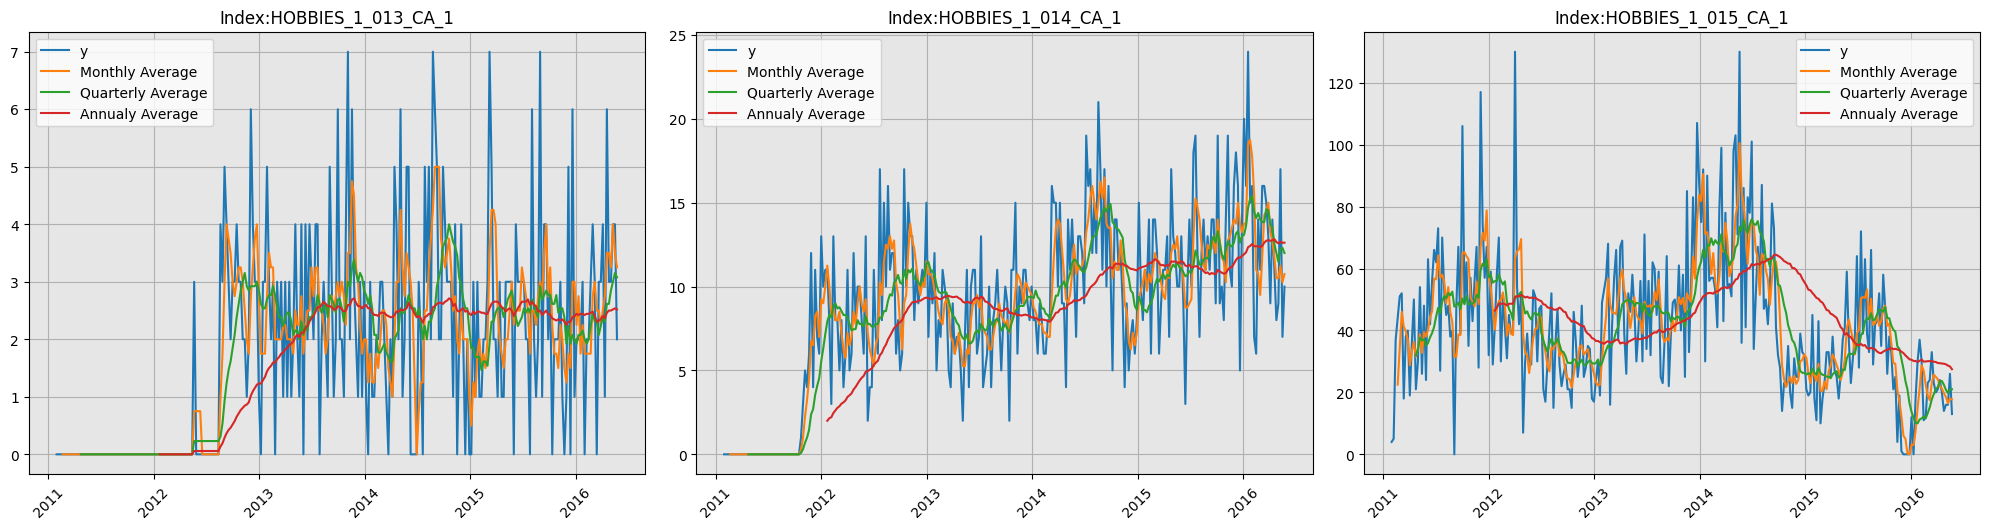

In [10]:
# visualize n series and adds moving averages if asked
visualize_series(pivoted_df = df, n = 15, add_moving_average = True)

Important Step 3: Understand the Characteristics of the Time Series

Some very basic and important features:

1. Trend
2. Seasonality
3. Forecastibility 
    * (Entropy is just a measure for forecastibility. Do not blindly trust it. Its not the most accurate metric)

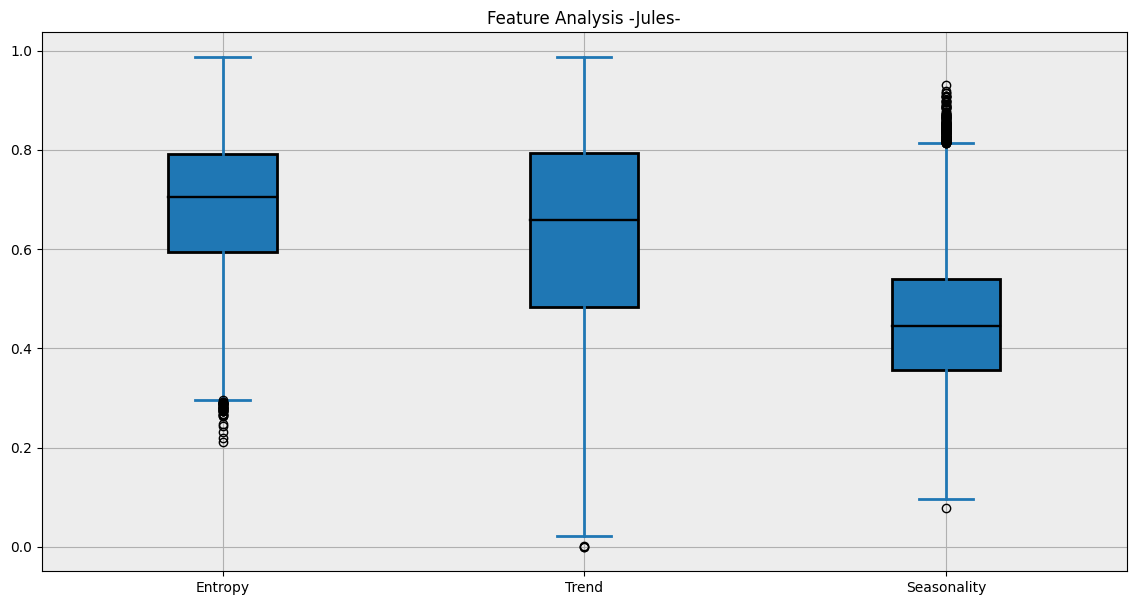

In [11]:
# Lets plot these features
features = get_features(pivot_df, seasonal_period = 12, plot = True)

In [12]:
features.head()

,unique_id,entropy,nperiods,seasonal_period,trend,spike,linearity,curvature,e_acf1,e_acf10,seasonal_strength,peak,trough
0,FOODS_1_001_CA_1,0.851049,1,12,0.301042,0.000236,-1.613218,0.699263,0.268663,0.426798,0.349115,12,10
1,FOODS_1_001_CA_2,0.810289,1,12,0.368820,0.000088,-1.786639,-0.334238,0.357953,0.518324,0.399566,5,10
2,FOODS_1_001_CA_3,0.848204,1,12,0.396581,0.000054,-1.851219,0.048018,0.094301,0.188764,0.493961,9,10
3,FOODS_1_001_CA_4,0.842166,1,12,0.182885,0.000075,-1.465815,0.499290,0.229196,0.337900,0.559717,8,8
4,FOODS_1_001_TX_1,0.812256,1,12,0.511189,0.000077,-0.351402,-0.748261,0.038686,0.198737,0.336522,1,4


Do we have strong trend or seasonality and we want to inspect further?

In [13]:
# STL

Is our data intermittent?

Smooth: 13758
Erratic: 1390
Intermittent: 13539
Lumpy: 1803


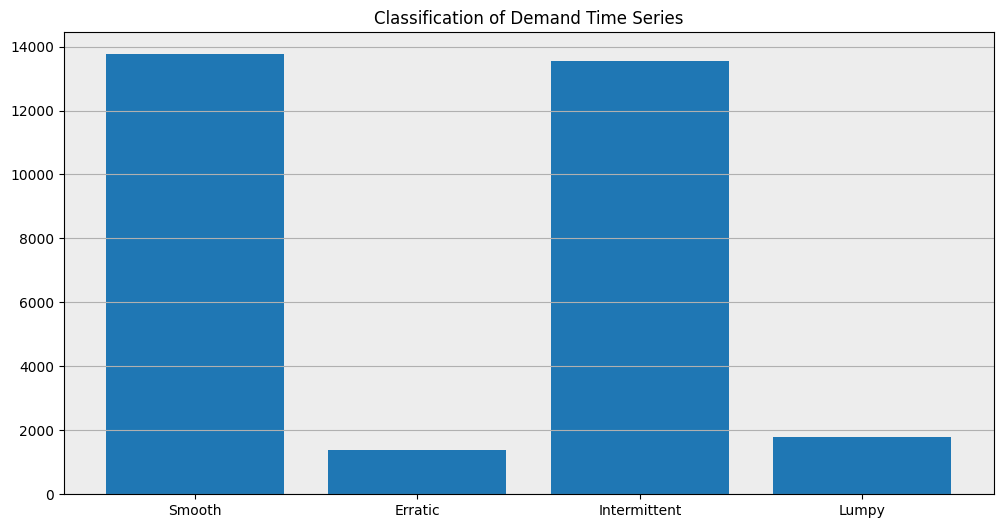

In [14]:
intermittency_classification(pivot_df, plot=True)

#### More Function to Be Added Soon!!

Always understan your data first!!

### Forecasting

The Fun Part.

When we understand our data its time to make predictions

**DeepRetail** makes it very easy to produce forecasts with statistal models

We currently support 4 models:

* ETS
* ARIMA
* Naive
* Seasonal Naive

More to be added soon :)

In [15]:
from DeepRetail.forecasting.statistical import StatisticalForecaster

In [20]:
# Parameter Initialization 
freq = 'M' # give the frequency
models = ['Naive', 'SNaive', 'ARIMA' , 'ETS'] # Pick the Models
h = 6 # How many steps ahead we want to forecast

**DeepRetail** uses StatisticalForecast objects to make forecasts.

Our virtual Forecasting Assistant makes everything very easy

In [17]:
forecaster = StatisticalForecaster(models, freq)

#### Select how many series to forecast.
* M5 includes over 30.000
* We only have 15 mins

Lets pick a small sample only!

In [18]:
total_to_forecast = 30 # pick the number of series to forecast

# Shuffle the dataset so we randomly pick some time series
pivot_df = pivot_df.sample(frac = 1. , random_state = 3)

In [19]:
# We fit the forecaster to the dataset
forecaster.fit(pivot_df, total_to_forecast = total_to_forecast)

Make predictions:

**Note:** 
* The model automatically makes the split between train-test split.
* If we do not want it we set the cv parameter equal to None (still under construction)

In [21]:
# Predict!
pred_df = forecaster.predict(h)

In [30]:
pred_df.head()

,date,cutoff,unique_id,y,Model,True,fh,cv
0,2015-12-31,2015-11-30,FOODS_1_156_CA_2,42.000000,Naive,34.0,1,1
1,2015-12-31,2015-11-30,FOODS_1_156_CA_2,30.000000,Seasonal Naive,34.0,1,1
2,2015-12-31,2015-11-30,FOODS_1_156_CA_2,37.692463,ARIMA,34.0,1,1
3,2015-12-31,2015-11-30,FOODS_1_156_CA_2,41.770330,ETS,34.0,1,1
4,2016-01-31,2015-11-30,FOODS_1_156_CA_2,42.000000,Naive,44.0,2,1


#### Evaluating

Next, we have to evaluate how accurate our forecasts are!

In **DeepRetail** we use the Evaluator for that!

In [31]:
from DeepRetail.evaluation import Evaluator

In [32]:
# First, we define the Evaluator object
eval = Evaluator(df = pivot_df, res_df = pred_df, freq = 'M')

Next we select the metrics we want to Evaluate the performance on.

**DeepRetail** supports all well-known metrics.

In [33]:
from DeepRetail.exploratory.metrics import mae, mse, rmsse, bias

In [34]:
# Define the metrics
metrics = [mae, bias, rmsse, mse]

# Hit evaluate
eval_df = eval.evaluate(metrics)

In [35]:
eval_df.head()

,unique_id,Model,mae,bias,rmsse,mse
0,FOODS_1_156_CA_2,ARIMA,10.854454,9.623633,0.893224,143.151668
1,FOODS_1_156_CA_2,ETS,4.076557,-1.103664,0.364007,23.773629
2,FOODS_1_156_CA_2,Naive,4.000000,-1.333333,0.368267,24.333333
3,FOODS_1_156_CA_2,Seasonal Naive,22.000000,22.000000,1.778726,567.666667
4,FOODS_2_288_TX_1,ARIMA,5.498501,-3.225284,0.691366,45.050334


In [36]:
# Now we can groupby based on the models and get the average performance
eval_df.groupby('Model').mean()

,mae,bias,rmsse,mse
Model,,,,
ARIMA,20.649958,1.968066,1.310310,2908.028787
ETS,19.200304,1.562374,1.193964,2891.088031
Naive,20.316092,-2.385057,1.330451,2823.959770
Seasonal Naive,24.310345,6.080460,1.525082,3566.632184


We can also use different plots to better understand the performance of the different metrics

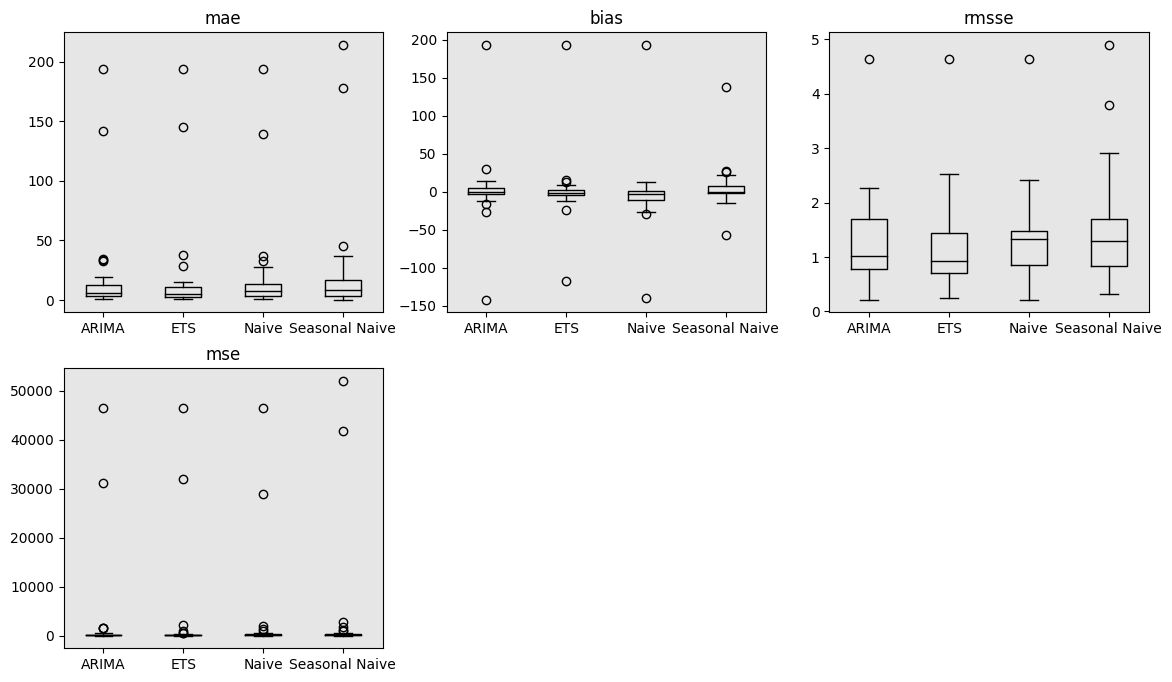

In [37]:
# Boxplot with metrics
eval.evaluate_boxplot()

Here we understand the importance of scale-independant metrics

The different time series have different scales and units.

One shop sells 10s of items while another 1000s.

MSE, MAE and Bias can not account for these differences.

RMSSE can.

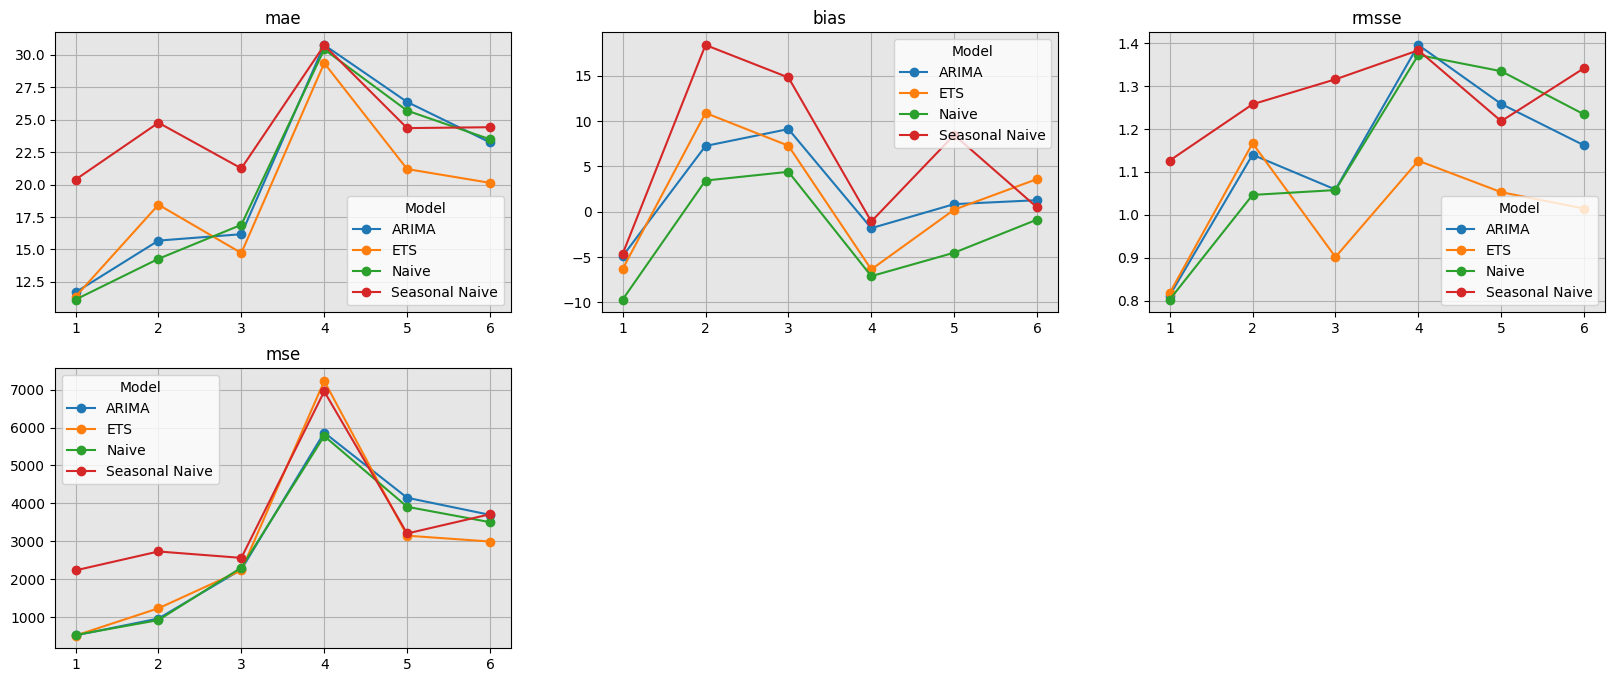

In [38]:
# Line plot
# Attention: Need to recalculate here
eval_df = eval.evaluate(metrics, per_fh = True)
eval.evaluate_lineplot()

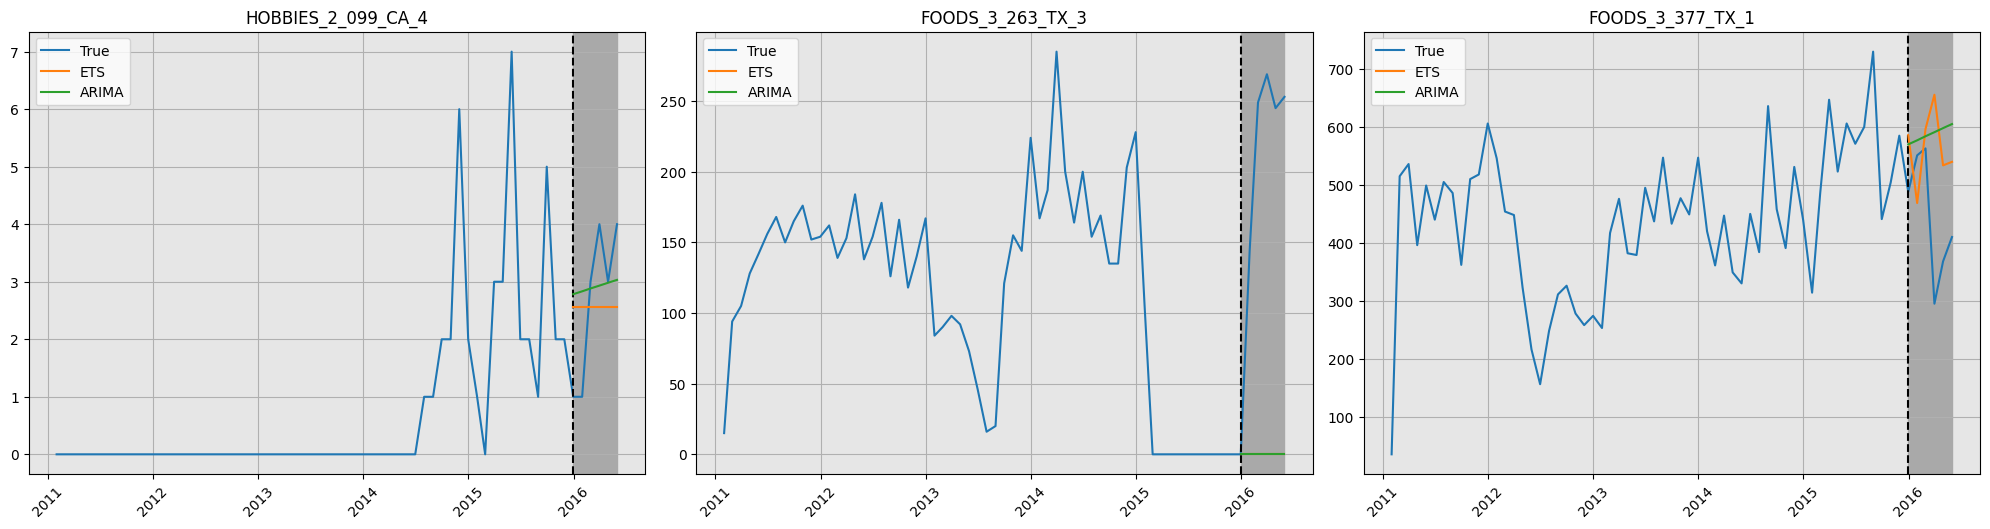

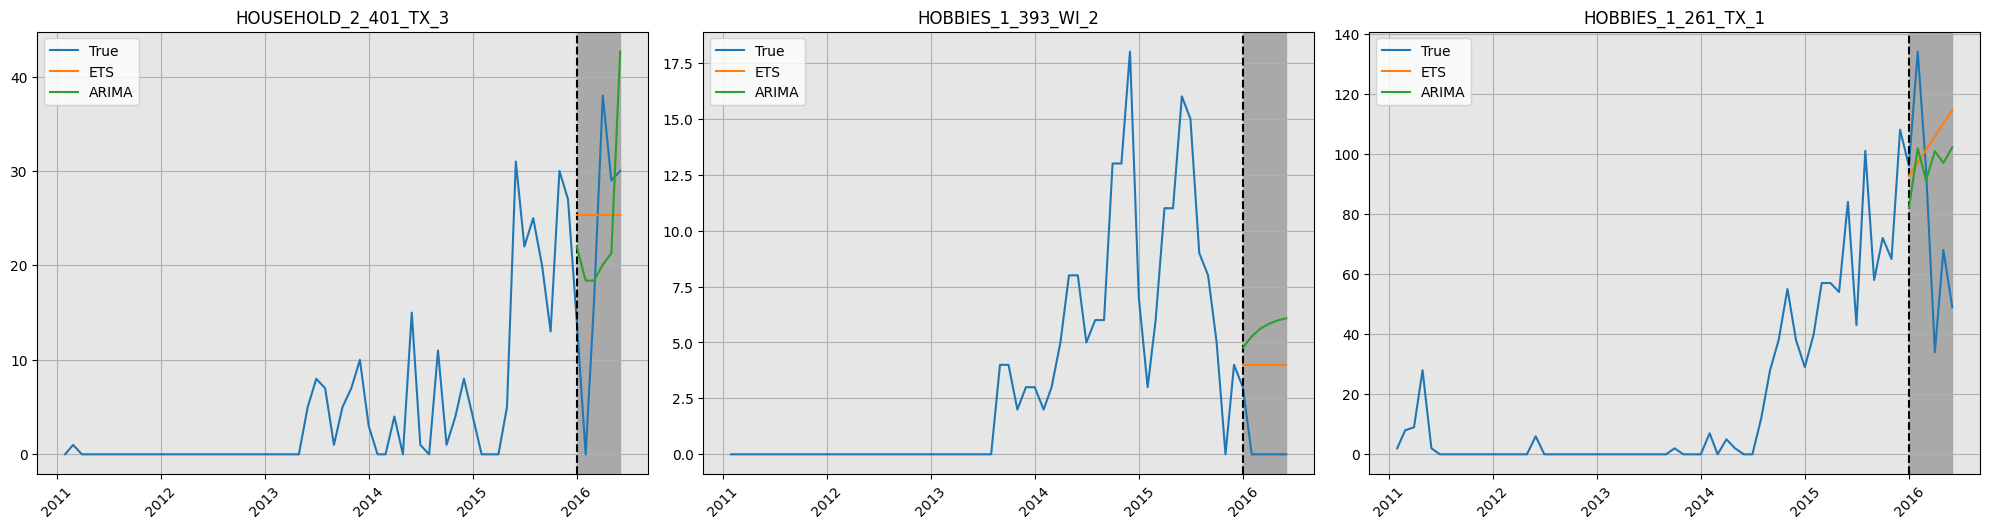

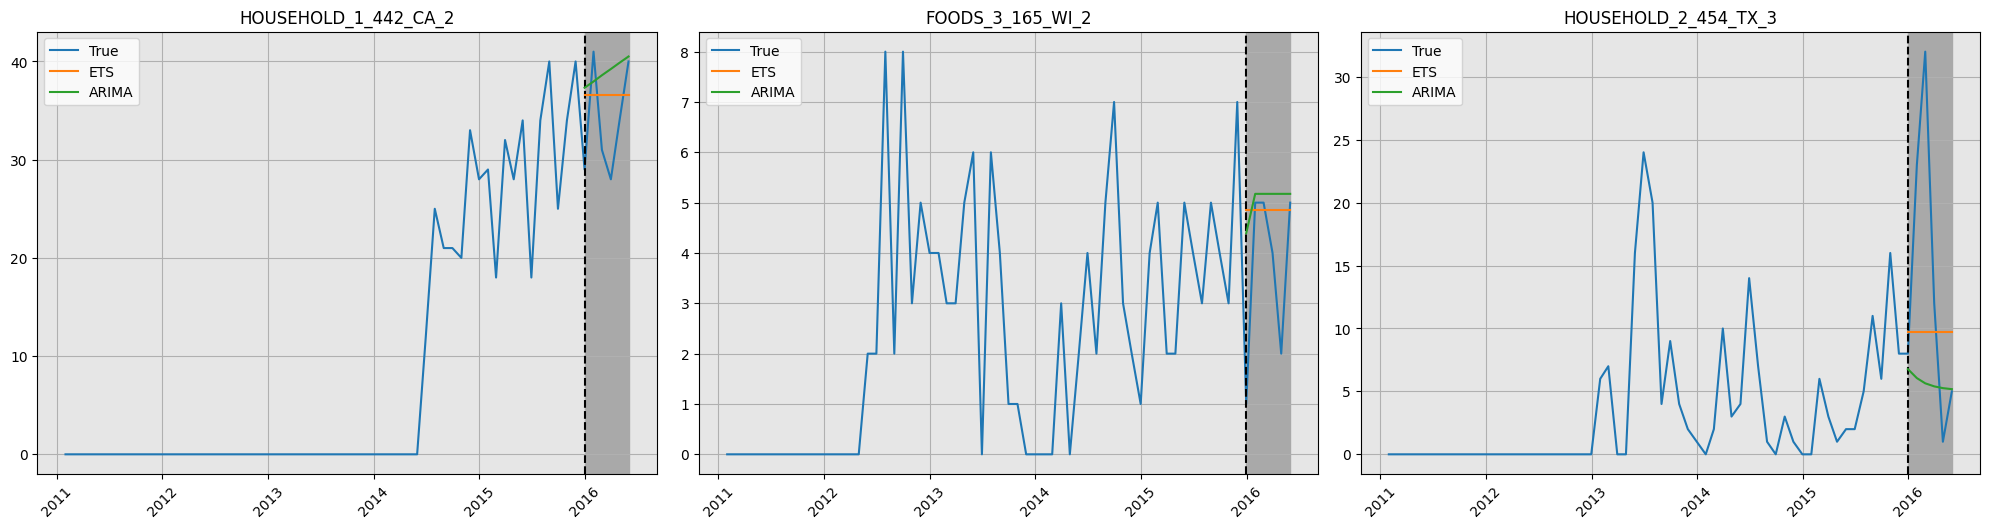

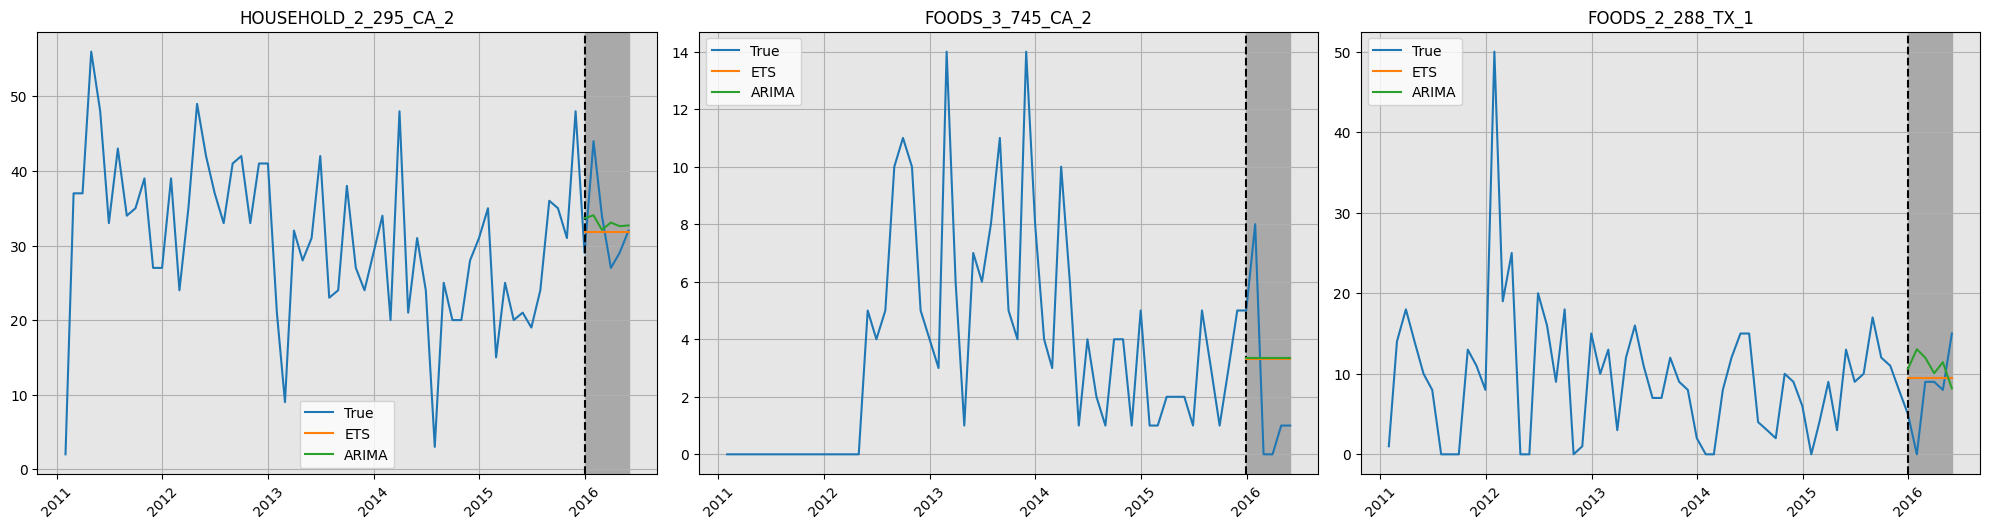

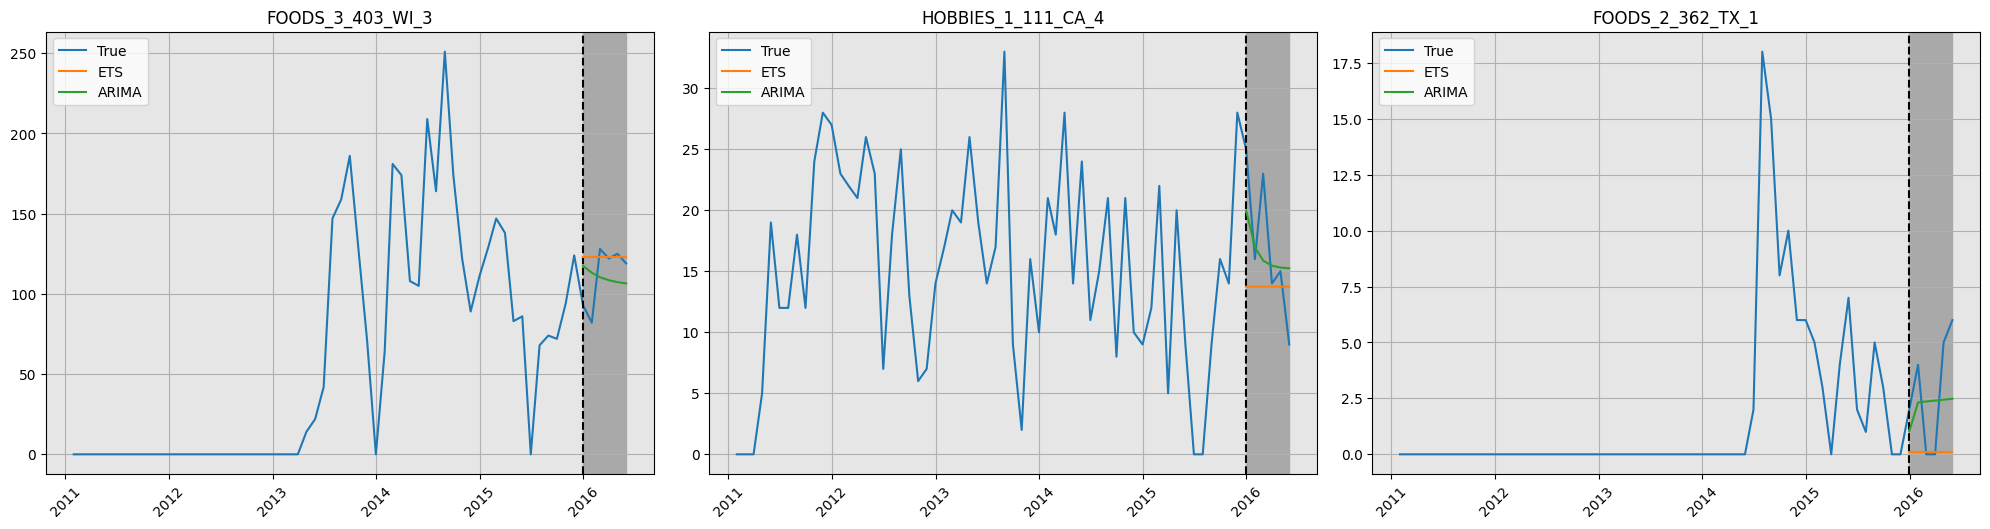

In [40]:
# Plot some forecasts
models = ['ETS', 'ARIMA']
n = 15
eval.plot_forecasts(models, n)